In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/E15_5_cluster9_15.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1949 × 18953
    obs: 'ground_truth', 'mclust', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'MISO_rp_12', 'MISO_rp_13', 'MISO_rp_14', 'MISO_rp_15', 'annotation', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'no_image', 'resnet', 'RNA', 'ATAC'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_12_colors', 'MISO_rp_12_colors', 'RNA_colors', 'Seurat_11_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_13_colors', 'SpatialGlue_14_colors', 'SpatialGlue_15_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'no_image_1046_12_colors', 'no_image_colors', 'resnet_7310_11_colors', 'resnet_7310_12_colors', 'resnet_9410_12_colors', 'resne

AnnData object with n_obs × n_vars = 1949 × 31433
    obs: 'ground_truth'
    obsm: 'spatial'


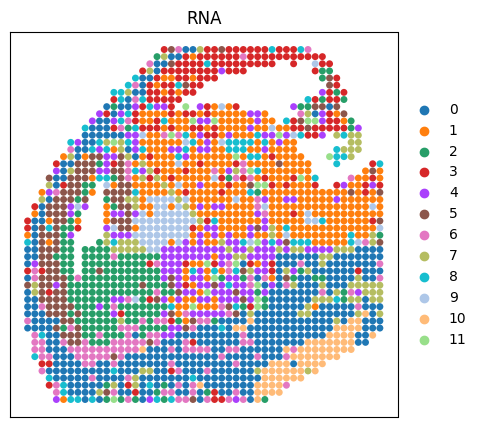

In [116]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/'
adata_omics1 = sc.read_h5ad(file_fold + 'RNA.h5ad')
print(adata_omics1)

sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)

adata_hvg = adata_omics1[:, adata_omics1.var['highly_variable']]
sc.tl.pca(adata_omics1, n_comps=50)
sc.pp.neighbors(adata_omics1, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics1, resolution=1.2)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/RNA.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


AnnData object with n_obs × n_vars = 1949 × 24333
    obs: 'ground_truth'
    obsm: 'spatial'


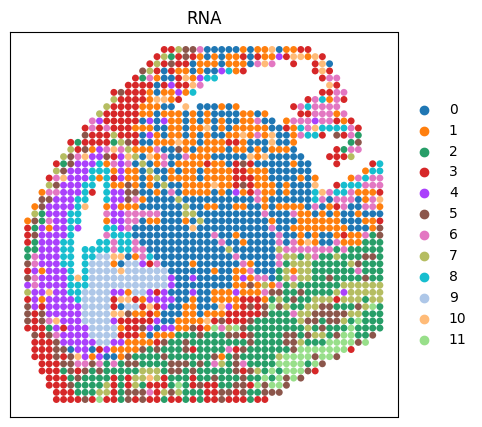

In [117]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/'
adata_omics2 = sc.read_h5ad(file_fold + 'ATAC.h5ad')
print(adata_omics2)

sc.pp.filter_genes(adata_omics2, min_cells=10)
sc.pp.highly_variable_genes(adata_omics2, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics2, target_sum=1e4)
sc.pp.log1p(adata_omics2)

adata_hvg = adata_omics2[:, adata_omics2.var['highly_variable']]
sc.tl.pca(adata_omics2, n_comps=50)
sc.pp.neighbors(adata_omics2, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics2, resolution=1.32)

custom_colors = [
  '#7da494',  # Gold
  '#dba0c1',  # BlueViolet
  '#9f8db8',  # qianzi
  '#d0d08a',  # Blue
  '#abc8e5',  # molv
  '#e5a79a',  # tufen
]
adata_omics2.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/ATAC.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [118]:
adata.obs['RNA']=adata_omics1.obs['leiden']
print(adata)
adata.obs['ATAC']=adata_omics2.obs['leiden']
print(adata)
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/E15_5_cluster9_15.h5ad'
#adata.write(adata_file)

AnnData object with n_obs × n_vars = 1949 × 18953
    obs: 'ground_truth', 'mclust', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'MISO_rp_12', 'MISO_rp_13', 'MISO_rp_14', 'MISO_rp_15', 'annotation', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'no_image', 'resnet', 'RNA', 'ATAC'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_12_colors', 'MISO_rp_12_colors', 'RNA_colors', 'Seurat_11_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_13_colors', 'SpatialGlue_14_colors', 'SpatialGlue_15_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'no_image_1046_12_colors', 'no_image_colors', 'resnet_7310_11_colors', 'resnet_7310_12_colors', 'resnet_9410_12_colors', 'resne

In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/"
csv_fold=file_fold+'cluster_csv/Seurat/'


cluster_data = pd.read_csv(csv_fold+'wnn_meta_10.csv', index_col=0)
adata.obs['Seurat_10'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_11.csv', index_col=0)
adata.obs['Seurat_11'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_12.csv', index_col=0)
adata.obs['Seurat_12'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_13.csv', index_col=0)
adata.obs['Seurat_13'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_14.csv', index_col=0)
adata.obs['Seurat_14'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_15.csv', index_col=0)
adata.obs['Seurat_15'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'rna_11.csv', index_col=0)
adata.obs['RNA'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'atac_11.csv', index_col=0)
adata.obs['ATAC'] = cluster_data['seurat_clusters'].values

print(adata.obs)
adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/E15_5_cluster9_15.h5ad')

In [16]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/"
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/none_E15_5_0.8_0.5_0.9_10_mclust_DMG_embedding_mclust12.csv')
adata.obs['no_image'] = cluster['mclust'].values
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/resnet_v2_E15_5_0.7_0.2_1.0_20_mclust_DMG_embedding_mclust12.csv')
adata.obs['resnet'] = cluster['mclust'].values
print(adata)
adata.write(adata_file)

AnnData object with n_obs × n_vars = 1949 × 18953
    obs: 'ground_truth', 'mclust', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'MISO_rp_12', 'MISO_rp_13', 'MISO_rp_14', 'MISO_rp_15', 'annotation', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'no_image', 'resnet'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'adj_spatial', 'hvg', 'log1p'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'adj_feature', 'alpha', 'alpha_omics1', 'alpha_omics2', 'emb_latent_omics1', 'emb_latent_omics2', 'feat', 'spatial'


In [2]:
import scanpy as sc
adata=sc.read(adata_file)
custom_colors = [
    
    '#D0D1CD',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#8F9D27',  
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
]

# # 为两个数据集设置相同的颜色映射
# adata.uns['RNA_cluster_colors'] = custom_colors
# adata.uns['ADT_cluster_colors'] = custom_colors
# adata.uns['MOMG_colors'] = custom_colors

adata.uns['annotation_colors'] = custom_colors
adata.uns['SpatialGlue_13_colors'] = custom_colors
adata.uns['SpatialGlue_14_colors'] = custom_colors
adata.uns['SpatialGlue_15_colors'] = custom_colors
adata.uns['SpatialGlue_9_colors'] = custom_colors
adata.uns['SpatialGlue_10_colors'] = custom_colors
adata.uns['SpatialGlue_11_colors'] = custom_colors
adata.uns['SpatialGlue_12_colors'] = custom_colors
adata.uns['no_image_1046_12_colors'] = custom_colors
adata.uns['resnet_9410_12_colors'] = custom_colors
adata.uns['resnet_7310_12_colors'] = custom_colors
adata.uns['resnet_7310_11_colors'] = custom_colors
adata.uns['resnet_v2_639_11_colors'] = custom_colors
adata.uns['Seurat_11_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['MISO_12_colors'] = custom_colors
adata.uns['MISO_rp_12_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
adata.write(adata_file)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
#adata.obs['Seurat'] = adata.obs['Seurat'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['resnet'] = adata.obs['resnet'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['SpatialGlue_9'] = adata.obs['SpatialGlue_9'].astype('category')
adata.obs['SpatialGlue_12'] = adata.obs['SpatialGlue_12'].astype('category')
adata.obs['SpatialGlue_11'] = adata.obs['SpatialGlue_11'].astype('category')
adata.obs['SpatialGlue_10'] = adata.obs['SpatialGlue_10'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['resnet'] = adata.obs['resnet'].astype('category')
adata.obs['MISO_12'] = adata.obs['MISO_12'].astype('category')
adata.obs['MISO_rp_12'] = adata.obs['MISO_rp_12'].astype('category')
adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.write(adata_file)

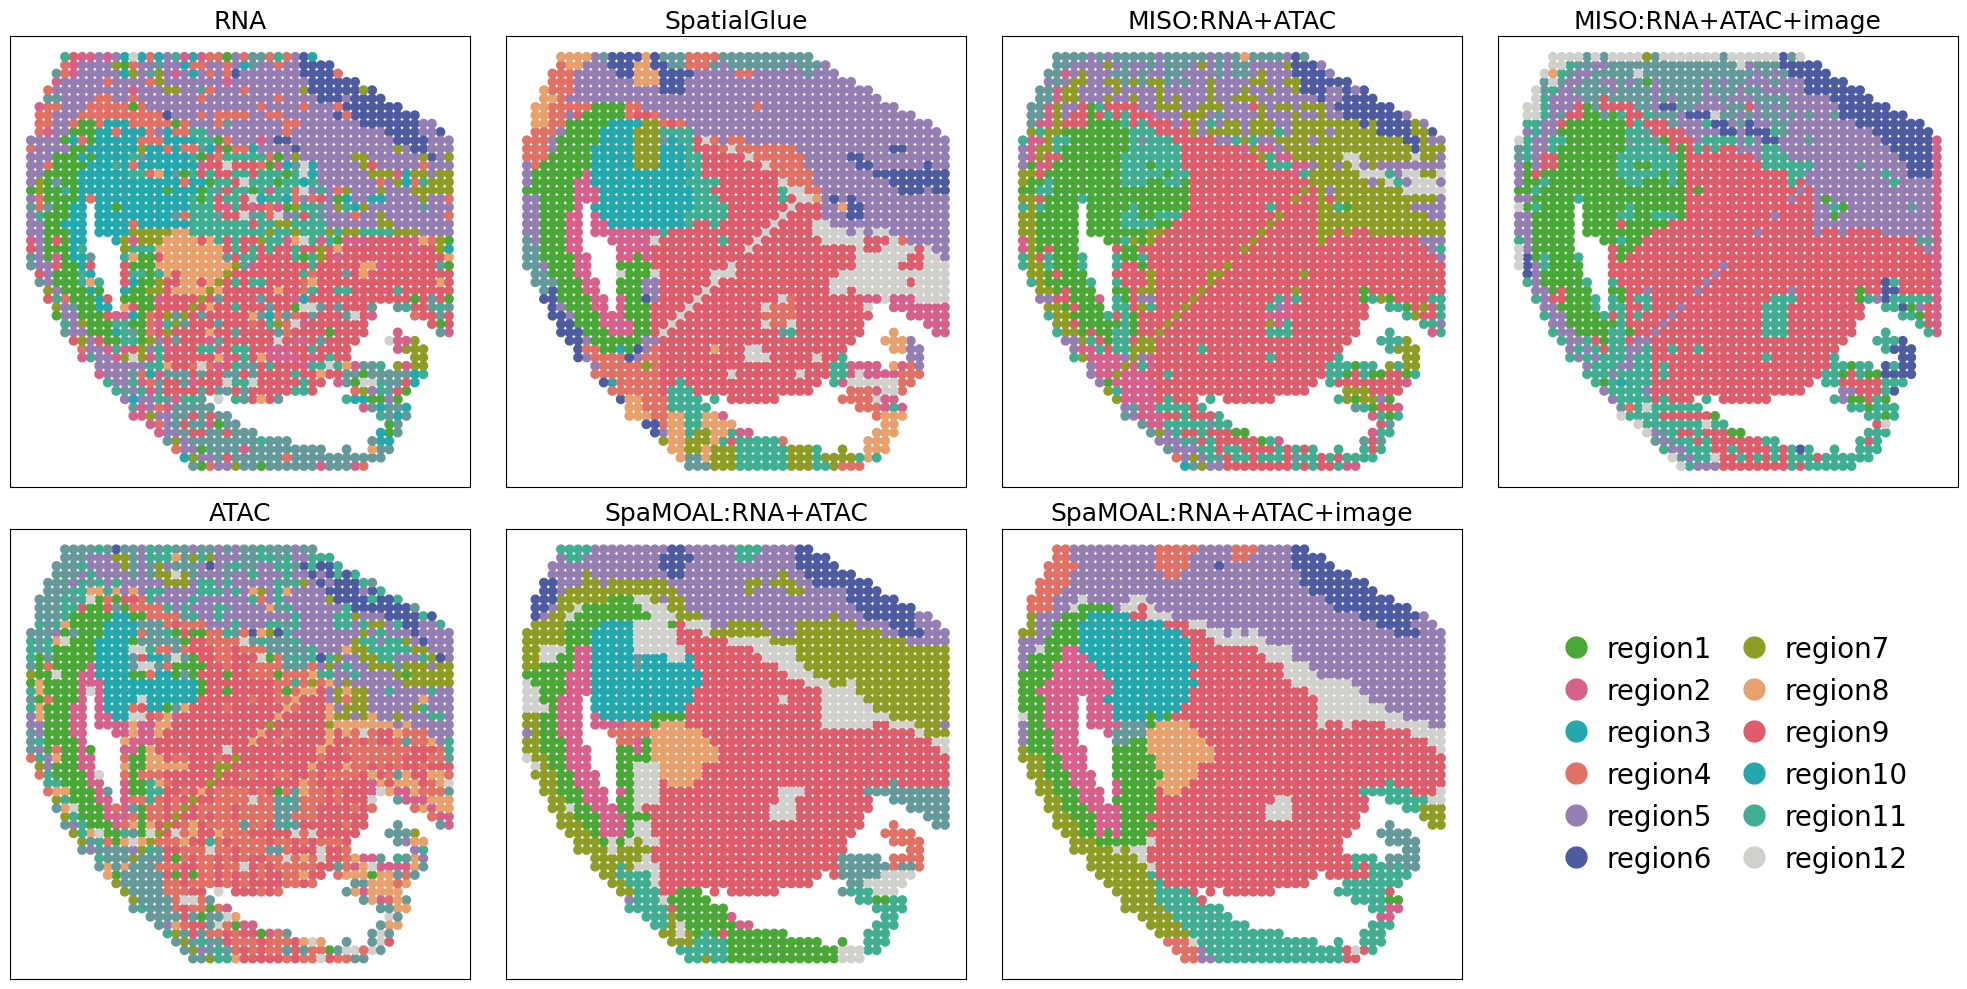

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2,4, figsize=(20,10))  #(7, 4)
s_size = 200
#sc.pl.embedding(adata, basis='spatial', color='annotation',title='annotation', ax=ax_list[1,3],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_12', title='SpatialGlue',ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_rp_12',title='MISO:RNA+ATAC', ax=ax_list[0,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_12',title='MISO:RNA+ATAC+image', ax=ax_list[0,3],s=s_size, show=False)

sc.pl.embedding(adata, basis='spatial', color='ATAC', ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image',title='SpaMOAL:RNA+ATAC', ax=ax_list[1,1], s=s_size,show=False)
sc.pl.embedding(adata, basis='spatial', color='resnet',title='SpaMOAL:RNA+ATAC+image', ax=ax_list[1,2], s=s_size,show=False)


# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        ax.invert_yaxis()

# 创建自定义图例

custom_legend = {
    # '1':'#D0D1CD',
    # '2':'#40AE91',
    # '3':'#D6608A',
    # '4':'#E8A16D',
    # '5':'#8F9D27',  
    # '6':'#49A836', 
    # '7':'#957EB2',  
    # '8':'#4D5BA0',  
    # '9':'#23A9AD', 
    # '10':'#DD5D6A',
    # '11':'#E17065',
    # '12':'#669999',
    'region1':'#49A836',
    'region2':'#D6608A',
    'region3':'#23A9AD',
    'region4':'#E17065',
    'region5':'#957EB2',  
    'region6':'#4D5BA0', 
    'region7':'#8F9D27',  
    'region8':'#E8A16D',  
    'region9':'#DD5D6A', 
    'region10':'#23A9AD',
    'region11':'#40AE91',
    'region12':'#D0D1CD',
    
    
}

# 创建带小圆点的自定义图例
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,  # 标记点大小
        label=label
    )
    for label, color in custom_legend.items()
]

# 在特定子图上添加自定义图例

ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=2,
    columnspacing=0.5,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)

plt.tight_layout(w_pad=1)
#plt.tight_layout(h_pad=0.1)
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/'
plt.savefig(file_fold + 'cluster_all.png',format='png')
plt.show()

In [8]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 定义要评估的所有聚类结果列名
cluster_columns = [
    'SpatialGlue_12',
    'MISO_rp_12', 
    'MISO_12',
    'no_image',
    'resnet'
]

# 初始化结果字典
metrics_results = {}

# 计算每个聚类结果的指标
for col in cluster_columns:
    predicted_labels = adata.obs[col].values
    
    metrics_results[col] = {
        'AMI': AMI(true_labels, predicted_labels),
        'NMI': NMI(true_labels, predicted_labels),
        'ARI': ARI(true_labels, predicted_labels),
        'Homogeneity': homogeneity_score(true_labels, predicted_labels),
        'V-measure': v_measure_score(true_labels, predicted_labels),
        'Mutual Information': mutual_info_score(true_labels, predicted_labels)
    }

# 打印表头
print("Method\t\tAMI\t\tNMI\t\tARI\t\tHomogeneity\tV-measure\tMutual Info")
print("-"*90)

# 打印每个方法的结果
for method, metrics in metrics_results.items():
    print(f"{method:<15}", end="")
    for metric_name in ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']:
        print(f"{metrics[metric_name]:.4f},\t", end="")
    print()  # 换行

Method		AMI		NMI		ARI		Homogeneity	V-measure	Mutual Info
------------------------------------------------------------------------------------------
SpatialGlue_12 0.5401,	0.5469,	0.4562,	0.5643,	0.5469,	1.1587,	
MISO_rp_12     0.4753,	0.4824,	0.4826,	0.4520,	0.4824,	0.9281,	
MISO_12        0.4499,	0.4569,	0.4636,	0.4218,	0.4569,	0.8662,	
no_image       0.5809,	0.5873,	0.6169,	0.5965,	0.5873,	1.2250,	
resnet         0.5898,	0.5961,	0.6302,	0.6001,	0.5961,	1.2323,	


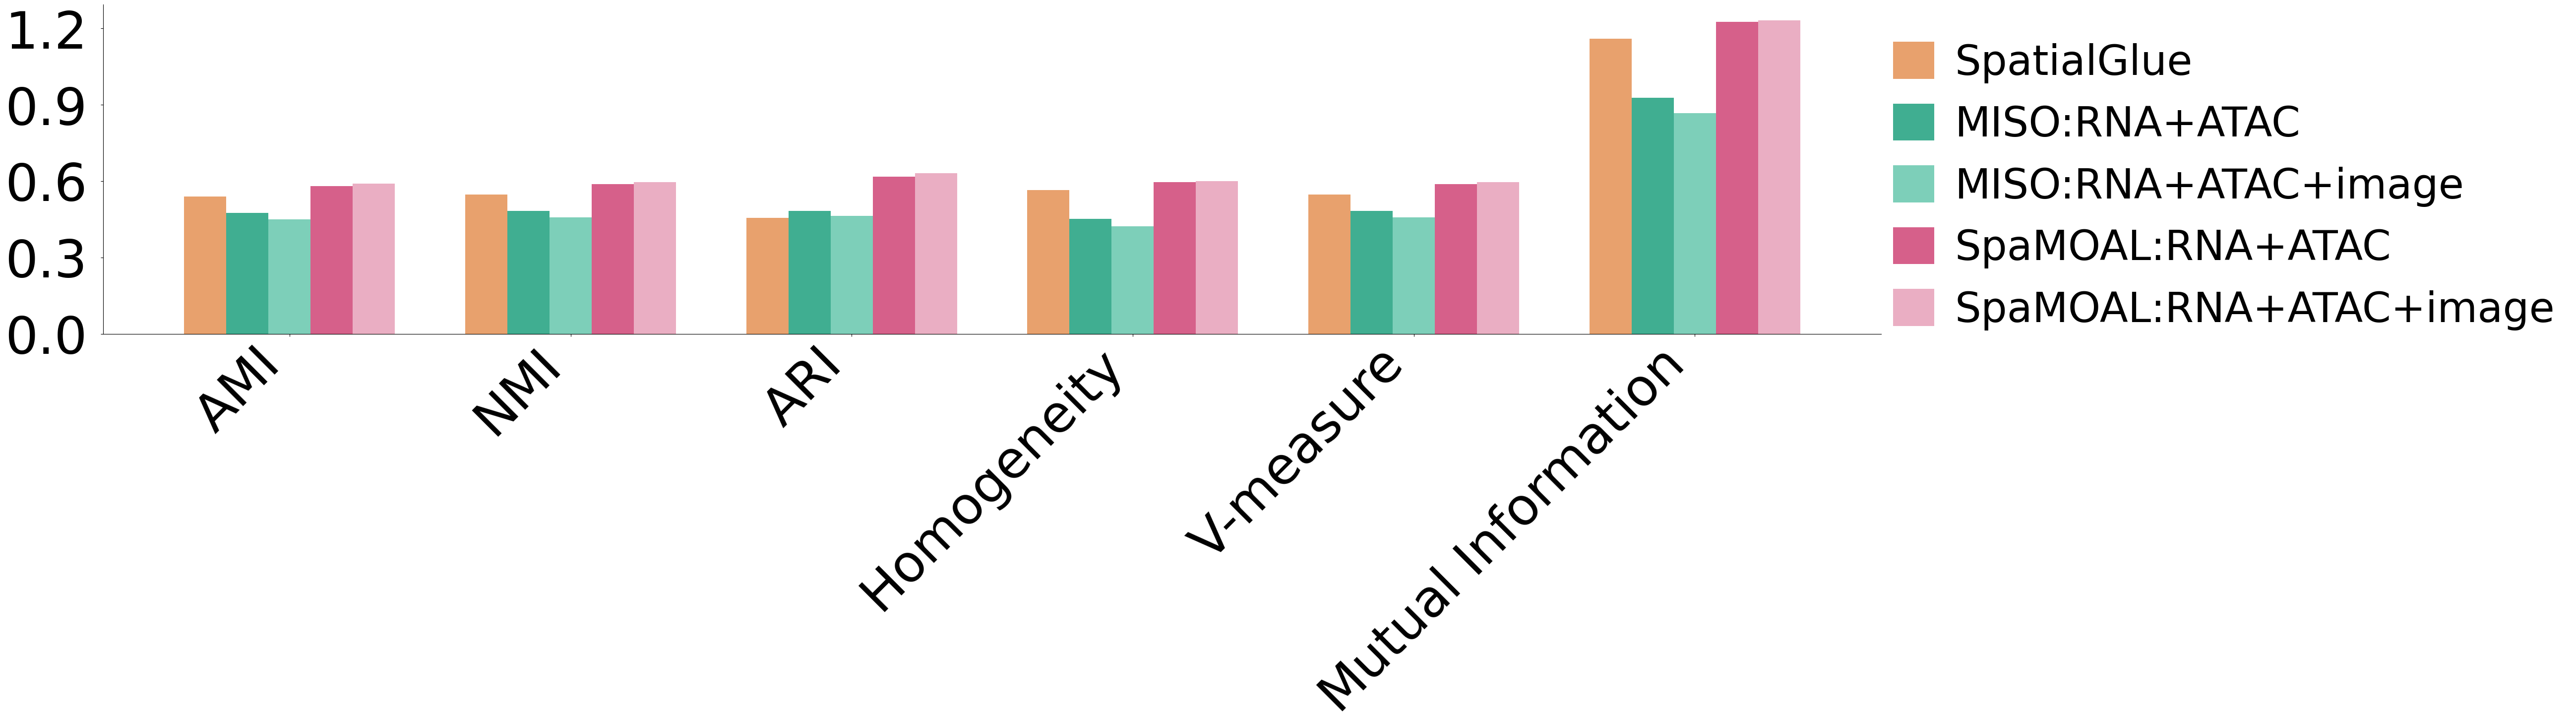

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'SpaMOAL:RNA+ATAC','SpaMOAL:RNA+ATAC+image']
data = {
    'SpatialGlue': [0.5401,	0.5469,	0.4562,	0.5643,	0.5469,	1.1587],
    'MISO:RNA+ATAC': [0.4753,	0.4824,	0.4826,	0.4520,	0.4824,	0.9281],
    'MISO:RNA+ATAC+image':[0.4499,	0.4569,	0.4636,	0.4218,	0.4569,	0.8662],
    'SpaMOAL:RNA+ATAC': [0.5809,	0.5873,	0.6169,	0.5965,	0.5873,	1.2250,],
    'SpaMOAL:RNA+ATAC+image':[0.5898,	0.5961,	0.6302,	0.6001,	0.5961,	1.2323]
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(55, 15))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#7dcfb9', '#D6608A',"#eaaec3"]

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=60, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()


ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=75,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=75)
ax.tick_params(axis='y', pad=20)


# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/metrics_default.png', format='png')

plt.show()

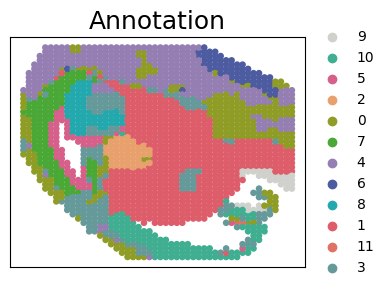

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

# 创建单个子图
fig, ax = plt.subplots(1, 1, figsize=(4, 3))  # 调整图的大小
s_size = 90  # 点的大小

# 绘制空间分布图
sc.pl.embedding(
    adata, 
    basis='spatial', 
    color='annotation', 
    title='Annotation', 
    ax=ax, 
    s=s_size, 
    show=False
)

# 设置标题字体大小
ax.set_title(ax.get_title(), fontsize=18)

# 隐藏坐标轴
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 反转Y轴（如果需要）
ax.invert_yaxis()

# 调整布局
plt.tight_layout()

# 保存图像
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/'
plt.savefig(file_fold + 'cluster_annotation.png', format='png', dpi=300)

# 显示图像
plt.show()

In [ ]:
import pandas as pd
import scanpy as sc


list_SpatialGlue12 = [1,12,4,3,10,7,6,8,9,5,11,2]
adata.obs['SpatialGlue_12']  = pd.Categorical(adata.obs['SpatialGlue_12'], 
                      categories=list_SpatialGlue12,
                      ordered=True)
list_no_image = [11,3,8,1,5,10,7,9,6,4,12,2]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)
list_resnet = [1,9,6,11,3,4,5,8,10,2,7,12]
adata.obs['resnet']  = pd.Categorical(adata.obs['resnet'], 
                      categories=list_resnet,
                      ordered=True)                      
list_MISO_12 = [1,0,6,3,5,9,2,7,8,4,10,11]
adata.obs['MISO_12']  = pd.Categorical(adata.obs['MISO_12'], 
                      categories=list_MISO_12,
                      ordered=True)
list_MISO_rp_12 = [5,2,1,3,9,7,8,0,6,10,4,11]
adata.obs['MISO_rp_12']  = pd.Categorical(adata.obs['MISO_rp_12'], 
                      categories=list_MISO_rp_12,
                      ordered=True)
list_annotation = [9,10,5,2,0,7,4,6,8,1,11,3]
adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
                      categories=list_annotation,
                      ordered=True)
list_RNA = ['11','4','8','9','7','5','0','10','2','1','6','3']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)
list_ATAC = ['10','5','8','6','7','4','2','11','9','0','1','3']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)


#adata.write(adata_file)

In [47]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/E15_5_cluster9_15.h5ad')
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}

# 遍历聚类结果列
for i in range(9, 16):
    predicted_labels = adata.obs[f'MISO_rp_{i}'].values  # 获取聚类结果
    
    # 计算各项指标
    ami = AMI(true_labels, predicted_labels)
    nmi = NMI(true_labels, predicted_labels)
    ari = ARI(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    mutual_info = mutual_info_score(true_labels, predicted_labels)
    
    # 将结果存储到字典中
    metrics_results[f'SpatialGlue_{i}'] = {
        'AMI': ami,
        'NMI': nmi,
        'ARI': ari,
        'Homogeneity': homogeneity,
        'V-measure': v_measure,
        'Mutual Information': mutual_info
    }

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},",end=" ")
    print()  # 打印一个空行以分隔不同的聚类结果

0.4555, 0.4613, 0.4657, 0.4058, 0.4613, 0.8333, 
0.4442, 0.4503, 0.4642, 0.4092, 0.4503, 0.8404, 
0.4428, 0.4501, 0.4608, 0.4141, 0.4501, 0.8503, 
0.4753, 0.4824, 0.4826, 0.4520, 0.4824, 0.9281, 
0.4747, 0.4820, 0.4887, 0.4574, 0.4820, 0.9393, 
0.4404, 0.4483, 0.3869, 0.4368, 0.4483, 0.8970, 
0.4423, 0.4508, 0.3843, 0.4441, 0.4508, 0.9119, 


In [38]:

import re

# 你的文本数据
data = """
{'AMI': 0.5885931853727626, 'NMI': 0.5933518206172781, 'ARI': 0.6351193092579748, 'Homogeneity': 0.5712778802247672, 'V-measure': 0.5933518206172781, 'Mutual Information': 1.1730692949760002}
{'AMI': 0.5751488830793983, 'NMI': 0.5807183302867542, 'ARI': 0.610800793058894, 'Homogeneity': 0.5582755157411676, 'V-measure': 0.5807183302867543, 'Mutual Information': 1.1463700736937128}
{'AMI': 0.5657587528533305, 'NMI': 0.5718323789464276, 'ARI': 0.6006447931446619, 'Homogeneity': 0.5714641930766768, 'V-measure': 0.5718323789464276, 'Mutual Information': 1.1734518721654907}
{'AMI': 0.5809406505395464, 'NMI': 0.587292270539604, 'ARI': 0.6168764439887336, 'Homogeneity': 0.5965488106044594, 'V-measure': 0.587292270539604, 'Mutual Information': 1.2249609461497328}
{'AMI': 0.5677829659050418, 'NMI': 0.5747797977036032, 'ARI': 0.554032837396331, 'Homogeneity': 0.5968514736212399, 'V-measure': 0.5747797977036032, 'Mutual Information': 1.2255824382536638}
{'AMI': 0.5466837193013804, 'NMI': 0.5543703099185158, 'ARI': 0.44813586049603094, 'Homogeneity': 0.5947309039916956, 'V-measure': 0.5543703099185159, 'Mutual Information': 1.2212280334948127}
{'AMI': 0.5543464072134016, 'NMI': 0.562401377716174, 'ARI': 0.44601810444842743, 'Homogeneity': 0.6103324983991801, 'V-measure': 0.5624013777161739, 'Mutual Information': 1.2532645466972645}

"""

# 使用正则表达式找到所有大括号内的数字
numbers = re.findall(r"{(.*?)}", data)

# 处理找到的字符串，将它们分割并转换为浮点数
extracted_numbers = []
for number_group in numbers:
    # 分割每个数字字符串，并将它们转换为浮点数
    numbers_list = [float(num.split(":")[1].strip()) for num in number_group.split(", ") if num]
    extracted_numbers.append(numbers_list)

# 打印提取的数字
for numbers in extracted_numbers:
    print(", ".join(map(str, numbers)) + ",")


0.5885931853727626, 0.5933518206172781, 0.6351193092579748, 0.5712778802247672, 0.5933518206172781, 1.1730692949760002,
0.5751488830793983, 0.5807183302867542, 0.610800793058894, 0.5582755157411676, 0.5807183302867543, 1.1463700736937128,
0.5657587528533305, 0.5718323789464276, 0.6006447931446619, 0.5714641930766768, 0.5718323789464276, 1.1734518721654907,
0.5809406505395464, 0.587292270539604, 0.6168764439887336, 0.5965488106044594, 0.587292270539604, 1.2249609461497328,
0.5677829659050418, 0.5747797977036032, 0.554032837396331, 0.5968514736212399, 0.5747797977036032, 1.2255824382536638,
0.5466837193013804, 0.5543703099185158, 0.44813586049603094, 0.5947309039916956, 0.5543703099185159, 1.2212280334948127,
0.5543464072134016, 0.562401377716174, 0.44601810444842743, 0.6103324983991801, 0.5624013777161739, 1.2532645466972645,


                     Method              Metric     Value
0               SpatialGlue                 AMI  0.532200
1               SpatialGlue                 NMI  0.537500
2               SpatialGlue                 ARI  0.450300
3               SpatialGlue         Homogeneity  0.524300
4               SpatialGlue           V-measure  0.537500
..                      ...                 ...       ...
205  SpaMORL:RNA+ATAC+image                 NMI  0.582363
206  SpaMORL:RNA+ATAC+image                 ARI  0.613256
207  SpaMORL:RNA+ATAC+image         Homogeneity  0.621404
208  SpaMORL:RNA+ATAC+image           V-measure  0.582363
209  SpaMORL:RNA+ATAC+image  Mutual Information  1.276000

[210 rows x 3 columns]


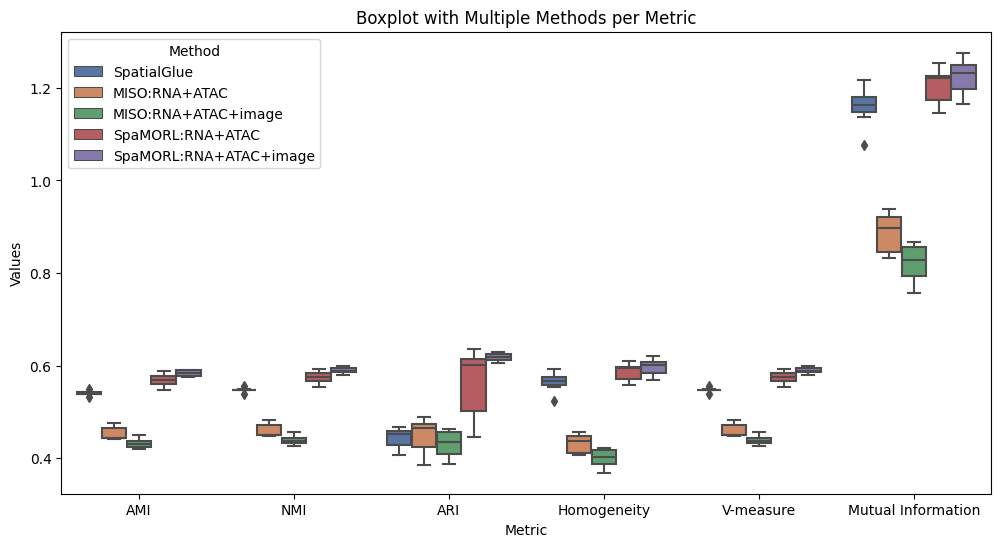

In [4]:
# E15_5
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建示例数据
np.random.seed(10)
data = {
    'Method': np.repeat([ 'SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'SpaMORL:RNA+ATAC', 'SpaMORL:RNA+ATAC+image'], 42),
    'Metric': np.tile(['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information'], 35),
    'Value':[
        0.5322, 0.5375, 0.4503, 0.5243, 0.5375, 1.0766, 
        0.5436, 0.5493, 0.4592, 0.5533, 0.5493, 1.1361, 
        0.5492, 0.5554, 0.4666, 0.5669, 0.5554, 1.1641, 
        0.5401, 0.5469, 0.4562, 0.5643, 0.5469, 1.1587, 
        0.5394, 0.5468, 0.4526, 0.5666, 0.5468, 1.1634, 
        0.5391, 0.5469, 0.4065, 0.5830, 0.5469, 1.1970, 
        0.5378, 0.5462, 0.4070, 0.5922, 0.5462, 1.2161,

        0.4555, 0.4613, 0.4657, 0.4058, 0.4613, 0.8333, 
        0.4442, 0.4503, 0.4642, 0.4092, 0.4503, 0.8404, 
        0.4428, 0.4501, 0.4608, 0.4141, 0.4501, 0.8503, 
        0.4753, 0.4824, 0.4826, 0.4520, 0.4824, 0.9281, 
        0.4747, 0.4820, 0.4887, 0.4574, 0.4820, 0.9393, 
        0.4404, 0.4483, 0.3869, 0.4368, 0.4483, 0.8970, 
        0.4423, 0.4508, 0.3843, 0.4441, 0.4508, 0.9119,

            0.4201, 0.4258, 0.4320, 0.3684, 0.4258, 0.7565, 
        0.4313, 0.4378, 0.4354, 0.3836, 0.4378, 0.7876, 
        0.4267, 0.4341, 0.3864, 0.4137, 0.4341, 0.8495, 
        0.4499, 0.4569, 0.4636, 0.4218, 0.4569, 0.8662, 
        0.4342, 0.4416, 0.4549, 0.3902, 0.4416, 0.8013, 
        0.4378, 0.4458, 0.4558, 0.4029, 0.4458, 0.8274, 
        0.4219, 0.4309, 0.3870, 0.4198, 0.4309, 0.8621,
            
            0.5885931853727626, 0.5933518206172781, 0.6351193092579748, 0.5712778802247672, 0.5933518206172781, 1.1730692949760002,
            0.5751488830793983, 0.5807183302867542, 0.610800793058894, 0.5582755157411676, 0.5807183302867543, 1.1463700736937128,
            0.5657587528533305, 0.5718323789464276, 0.6006447931446619, 0.5714641930766768, 0.5718323789464276, 1.1734518721654907,
            0.5809406505395464, 0.587292270539604, 0.6168764439887336, 0.5965488106044594, 0.587292270539604, 1.2249609461497328,
            0.5677829659050418, 0.5747797977036032, 0.554032837396331, 0.5968514736212399, 0.5747797977036032, 1.2255824382536638,
            0.5466837193013804, 0.5543703099185158, 0.44813586049603094, 0.5947309039916956, 0.5543703099185159, 1.2212280334948127,
            0.5543464072134016, 0.562401377716174, 0.44601810444842743, 0.6103324983991801, 0.5624013777161739, 1.2532645466972645,

            0.584126803593694, 0.5889399734883397, 0.6044406744035793, 0.5676889596842141, 0.5889399734883397, 1.1656997597043472,
        0.5748834465987032, 0.580292638906696, 0.6094844612595354, 0.5719672512495411, 0.5802926389066961, 1.1744848582421468,
        0.589239719882796, 0.5949780337727061, 0.6214078591260358, 0.5947003885187869, 0.594978033772706, 1.2211653726330325,
        0.5898298916741888, 0.5960981189835916, 0.6301804603650077, 0.6001354464788183, 0.5960981189835916, 1.2323257900586455,
        0.5808750245317186, 0.5877767989147765, 0.6192408883975506, 0.6005369801910116, 0.5877767989147765, 1.2331503045112029,
        0.590783343191133, 0.5980103600401362, 0.6264082024048782, 0.6166807338673184, 0.5980103600401362, 1.2663000944801062,
        0.5745351400749136, 0.5823628278083423, 0.6132560503335417, 0.6214044431720115, 0.5823628278083423, 1.2759998194922977,
        
            
            ]
          
            
}

# 将数据转换为Pandas DataFrame
df = pd.DataFrame(data)
print(df)

# 画箱线图，每个指标都有多个方法的箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', hue='Method', data=df, palette='deep')
plt.title('Boxplot with Multiple Methods per Metric')
plt.ylabel('Values')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

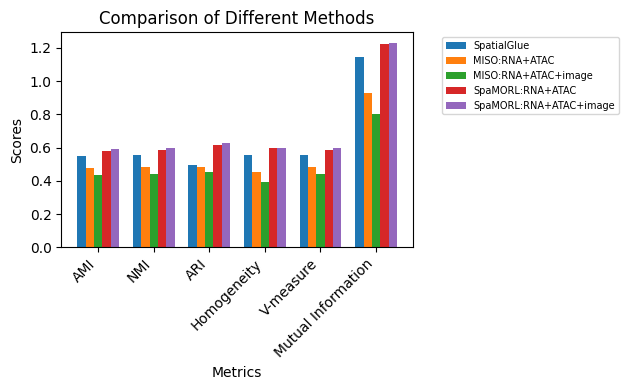

In [8]:

import matplotlib.pyplot as plt
import numpy as np



# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue','MISO:RNA+ATAC','MISO:RNA+ATAC+image','SpaMORL:RNA+ATAC','SpaMORL:RNA+ATAC+image']
data = {
    'Seurat':[0.4907,0.4977,0.4670,0.5037,0.4977,1.0344],
    'SpatialGlue':[0.5482,0.5545,0.4940,0.5568,0.5545,1.1433],
    'MISO:RNA+ATAC':[0.4753, 0.4824, 0.4826, 0.4520, 0.4824, 0.9281],
    'MISO:RNA+ATAC+image':[0.4342, 0.4416, 0.4549, 0.3902, 0.4416, 0.8013],
    'SpaMORL:RNA+ATAC':[0.5809406505395464, 0.587292270539604, 0.6168764439887336, 0.5965488106044594, 0.587292270539604, 1.2249609461497328],
    'SpaMORL:RNA+ATAC+image':[ 0.5898298916741888, 0.5960981189835916, 0.6301804603650077, 0.6001354464788183, 0.5960981189835916, 1.2323257900586455],
    'default':[ 0.5269043220581052, 0.5339754827532356,  0.3939272316065663, 0.5501988355326749, 0.5339754827532356, 1.129785315407263],
    }

# 设置图形大小
fig, ax = plt.subplots(figsize=(8, 4))

# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 绘制条形图
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method)

# 添加标签和标题
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Methods')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1), borderaxespad=0.5, fontsize=7)

# 显示图形
plt.tight_layout()
#plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/metrics.png', format='png')  # 修改路径和文件名
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/metrics_default.png', format='png')  # 修改路径和文件名

plt.show()


In [3]:

import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import scanpy as sc
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import subprocess
import time
import os
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
import sys
import os
import pandas as pd
import scanpy as sc
import sys
import re
import torch
import multiprocessing
def calculate_icc(cluster_labels, data):
    unique_clusters = np.unique(cluster_labels)
    icc_values = []

    for cluster in unique_clusters:
        # 筛选出当前聚类的数据
        cluster_data = data[cluster_labels == cluster]
        # 计算当前聚类的组内方差
        within_cluster_variance = np.var(cluster_data, axis=0).mean()

        # 计算所有聚类均值
        all_cluster_means = []
        for other_cluster in unique_clusters:
            other_cluster_data = data[cluster_labels == other_cluster]
            other_cluster_mean = np.mean(other_cluster_data, axis=0)
            all_cluster_means.append(other_cluster_mean)
        all_cluster_means = np.array(all_cluster_means)
        # 计算各聚类均值之间的方差
        across_cluster_variance = np.var(all_cluster_means, axis=0).mean()

        # 计算ICC
        icc = within_cluster_variance / (within_cluster_variance + across_cluster_variance)
        icc_values.append(icc)

    return icc_values
#image
data = pd.read_csv('/home/lixiangyu/DMG/DMG-main/input/E15_5/E15_5_image_resnet_v2_cos_unnormalize.csv',index_col=0)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)
pca = PCA(n_components=50)
pca50_image = pca.fit_transform(data_scaled)

num_gpus = 4
# RNA
adata_omics1=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/RNA.h5ad')
sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_rna = adata.obsm['X_pca']

# ATAC
adata_omics1=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/ATAC.h5ad')
sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_atac = adata.obsm['X_pca']

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61:

In [4]:
import scanpy as sc
adata_file='/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E15_5/E15_5_cluster9_15.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1949 × 18953
    obs: 'ground_truth', 'mclust', 'SpatialGlue_9', 'SpatialGlue_10', 'SpatialGlue_11', 'SpatialGlue_12', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'MISO_rp_9', 'MISO_rp_10', 'MISO_rp_11', 'MISO_rp_12', 'MISO_rp_13', 'MISO_rp_14', 'MISO_rp_15', 'annotation', 'MISO_9', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15', 'no_image', 'resnet', 'RNA', 'ATAC'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ATAC_colors', 'MISO_12_colors', 'MISO_rp_12_colors', 'RNA_colors', 'Seurat_11_colors', 'SpatialGlue_10_colors', 'SpatialGlue_11_colors', 'SpatialGlue_12_colors', 'SpatialGlue_13_colors', 'SpatialGlue_14_colors', 'SpatialGlue_15_colors', 'SpatialGlue_9_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'no_image_1046_12_colors', 'no_image_colors', 'resnet_7310_11_colors', 'resnet_7310_12_colors', 'resnet_9410_12_colors', 'resne

In [5]:
import pandas as pd
labels_resnet = pd.read_csv("/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_MISAR/output_dmg/E15_5/resnet_E15_5_none_0.7_0.2_1.0_20_mclust_12_DMG_label.csv", index_col=0)
a = pd.DataFrame(labels_resnet)
labels_resnet = a['cluster_result']
labels_none = pd.read_csv("/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_MISAR/output_dmg/E15_5/E15_5_0.8_0.5_0.9_10_mclust_12_DMG_label.csv", index_col=0)
a = pd.DataFrame(labels_none)
labels_none = a['cluster_result']
labels_SpatialGlue=adata.obs['SpatialGlue_12']
labels_MISO=adata.obs['MISO_rp_12']
labels_MISO_image=adata.obs['MISO_12']

In [6]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO_image, pca50_rna), end=",")
print()
print(calculate_icc(labels_none, pca50_rna), end=",")
print()
print(calculate_icc(labels_resnet, pca50_rna), end=",")
print()
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO_image, pca50_atac), end=",")
print()
print(calculate_icc(labels_none, pca50_atac), end=",")
print()
print(calculate_icc(labels_resnet, pca50_atac), end=",")
print()
print('image')
print(calculate_icc(labels_MISO_image, pca50_image), end=",")
print()
print(calculate_icc(labels_resnet, pca50_image), end=",")
print()

rna
[0.6275202, 0.9295305, 0.91374606, 0.7561516, 0.60666037, 0.8296063, 0.6943408, 0.87862283, 0.72674257, 0.8629379, 0.8757313, 0.7597304],
[0.26616228, 0.5139746, 0.488133, 0.0, 0.0, 0.19470568, 0.0, 0.21557602, 0.5287498, 0.29930267, 0.21546026, 0.7219042],
[0.50285375, 0.7180447, 0.31843373, 0.0, 0.20872033, 0.0, 0.4578726, 0.4349547, 0.0, 0.2233855, 0.0, 0.5861172],
[0.40857157, 0.72854763, 0.87934273, 0.53313965, 0.74938834, 0.6123976, 0.8518221, 0.5740117, 0.86806643, 0.7020908, 0.75740963, 0.70896477],
[0.6607551, 0.51034427, 0.7949113, 0.64578813, 0.778355, 0.54082614, 0.898045, 0.7326121, 0.7144437, 0.67913824, 0.37904736, 0.67204976],
atac
[0.6273723, 0.88390034, 0.90302557, 0.75792545, 0.6607258, 0.6423723, 0.6982222, 0.8326036, 0.81255597, 0.8887394, 0.81156963, 0.83804613],
[0.19250117, 0.3954113, 0.61744624, 0.0, 0.0, 0.16001888, 0.0, 0.25119328, 0.37407464, 0.19787236, 0.29170942, 0.7009804],
[0.6226565, 0.73927504, 0.24815778, 0.0, 0.3262493, 0.0, 0.41856024, 0.296017

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

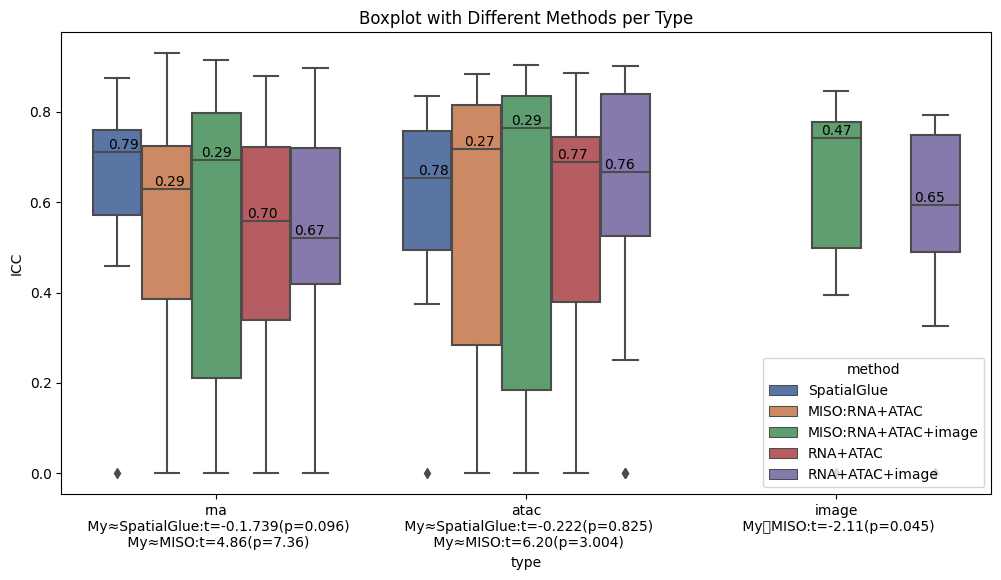

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 整理数据，将数据转换为适合绘图的格式
data_rna = [
    [0.6275202, 0.9295305, 0.91374606, 0.7561516, 0.60666037, 0.8296063, 0.6943408, 0.87862283, 0.72674257, 0.8629379, 0.8757313, 0.7597304],
    [0.26616228, 0.5139746, 0.488133, 0.0, 0.0, 0.19470568, 0.0, 0.21557602, 0.5287498, 0.29930267, 0.21546026, 0.7219042],
    [0.50285375, 0.7180447, 0.31843373, 0.0, 0.20872033, 0.0, 0.4578726, 0.4349547, 0.0, 0.2233855, 0.0, 0.5861172],
    [0.40857157, 0.72854763, 0.87934273, 0.53313965, 0.74938834, 0.6123976, 0.8518221, 0.5740117, 0.86806643, 0.7020908, 0.75740963, 0.70896477],
    [0.6607551, 0.51034427, 0.7949113, 0.64578813, 0.778355, 0.54082614, 0.898045, 0.7326121, 0.7144437, 0.67913824, 0.37904736, 0.67204976],
]
data_atac = [
    [0.6273723, 0.88390034, 0.90302557, 0.75792545, 0.6607258, 0.6423723, 0.6982222, 0.8326036, 0.81255597, 0.8887394, 0.81156963, 0.83804613],
    [0.19250117, 0.3954113, 0.61744624, 0.0, 0.0, 0.16001888, 0.0, 0.25119328, 0.37407464, 0.19787236, 0.29170942, 0.7009804],
    [0.6226565, 0.73927504, 0.24815778, 0.0, 0.3262493, 0.0, 0.41856024, 0.29601735, 0.0, 0.30770043, 0.0, 0.5186333],
    [0.6161453, 0.7958139, 0.88679165, 0.6733159, 0.7170364, 0.78329206, 0.79606885, 0.67972314, 0.8365076, 0.8159407, 0.8061507, 0.85078126],
    [0.73956865, 0.684639, 0.83450335, 0.73868084, 0.73475903, 0.69676894, 0.90256304, 0.66388375, 0.8585007, 0.8407617, 0.60923266, 0.8469235],
]
data_image = [
    [0.7138850925770912, 0.7528037132185278, 0.773114893538609, 0.0, 0.5319854120578212, 0.0, 0.7467156562368619, 0.7939767569623164, 0.0, 0.5476798079158793, 0.0, 0.7844301378393834],
[0.8075428958516667, 0.5534442431436036, 0.7355838298448495, 0.6495964500520162, 0.8466865606056593, 0.5456230228864495, 0.7887932512449324, 0.7469815289335767, 0.7657684023747005, 0.32502598267827104, 0.39526712157234517, 0.6323672599235328]
]

# 转换为DataFrame
method_rna = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'] * len(data_rna[0])
method_atac = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'] * len(data_atac[0])
method_image = ['MISO:RNA+ATAC+image', 'RNA+ATAC+image'] * len(data_image[0])

df_rna = pd.DataFrame({
    'type': 'rna\n My≈SpatialGlue:t=-0.1.739(p=0.096)\n My≈MISO:t=4.86(p=7.36)',
   'method': method_rna,
    'value': [val for sublist in data_rna for val in sublist]
})
df_atac = pd.DataFrame({
    'type': 'atac\n My≈SpatialGlue:t=-0.222(p=0.825)\n My≈MISO:t=6.20(p=3.004)',
   'method': method_atac,
    'value': [val for sublist in data_atac for val in sublist]
})
df_image = pd.DataFrame({
    'type': 'image\n My＞MISO:t=-2.11(p=0.045)',
   'method': method_image,
    'value': [val for sublist in data_image for val in sublist]
})

df = pd.concat([df_rna, df_atac, df_image], ignore_index=True)

# 绘制箱线图
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='type', y='value', hue='method', data=df, palette='deep')

# 按照你要求的方式计算每组均值
grouped_mean = {}
data_rna = [
    [0.6275202, 0.9295305, 0.91374606, 0.7561516, 0.60666037, 0.8296063, 0.6943408, 0.87862283, 0.72674257, 0.8629379, 0.8757313, 0.7597304],
    [0.26616228, 0.5139746, 0.488133, 0.0, 0.0, 0.19470568, 0.0, 0.21557602, 0.5287498, 0.29930267, 0.21546026, 0.7219042],
    [0.50285375, 0.7180447, 0.31843373, 0.0, 0.20872033, 0.0, 0.4578726, 0.4349547, 0.0, 0.2233855, 0.0, 0.5861172],
    
    [0.40857157, 0.72854763, 0.87934273, 0.53313965, 0.74938834, 0.6123976, 0.8518221, 0.5740117, 0.86806643, 0.7020908, 0.75740963, 0.70896477],
    [0.6607551, 0.51034427, 0.7949113, 0.64578813, 0.778355, 0.54082614, 0.898045, 0.7326121, 0.7144437, 0.67913824, 0.37904736, 0.67204976],
]
data_atac = [
    [0.6273723, 0.88390034, 0.90302557, 0.75792545, 0.6607258, 0.6423723, 0.6982222, 0.8326036, 0.81255597, 0.8887394, 0.81156963, 0.83804613],
    [0.19250117, 0.3954113, 0.61744624, 0.0, 0.0, 0.16001888, 0.0, 0.25119328, 0.37407464, 0.19787236, 0.29170942, 0.7009804],
    [0.6226565, 0.73927504, 0.24815778, 0.0, 0.3262493, 0.0, 0.41856024, 0.29601735, 0.0, 0.30770043, 0.0, 0.5186333],
    
    [0.6161453, 0.7958139, 0.88679165, 0.6733159, 0.7170364, 0.78329206, 0.79606885, 0.67972314, 0.8365076, 0.8159407, 0.8061507, 0.85078126],
    [0.73956865, 0.684639, 0.83450335, 0.73868084, 0.73475903, 0.69676894, 0.90256304, 0.66388375, 0.8585007, 0.8407617, 0.60923266, 0.8469235],
]
data_image = [
    [0.7138850925770912, 0.7528037132185278, 0.773114893538609, 0.0, 0.5319854120578212, 0.0, 0.7467156562368619, 0.7939767569623164, 0.0, 0.5476798079158793, 0.0, 0.7844301378393834],
[0.8075428958516667, 0.5534442431436036, 0.7355838298448495, 0.6495964500520162, 0.8466865606056593, 0.5456230228864495, 0.7887932512449324, 0.7469815289335767, 0.7657684023747005, 0.32502598267827104, 0.39526712157234517, 0.6323672599235328]
]
methods_rna = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image']
methods_atac = ['SpatialGlue', 'MISO:RNA+ATAC', 'MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image']
methods_image = ['MISO:RNA+ATAC+image', 'RNA+ATAC+image']

grouped_mean = {}

# 双样本t检验的t统计量: -1.7392414081970118
# 双样本t检验的p值: 0.09596749371107673
# 双样本t检验的t统计量: 4.862024829118524
# 双样本t检验的p值: 7.36230254061311e-05
# 双样本t检验的t统计量: -0.222633607856361
# 双样本t检验的p值: 0.8258746523457214
# 双样本t检验的t统计量: 6.208446811638372
# 双样本t检验的p值: 3.0049296922356327e-06
# 双样本t检验的t统计量: -2.1176144508188552
# 双样本t检验的p值: 0.04574502566236347
# 计算 data_rna 的均值
for i, row in enumerate(data_rna):
    mean_val = sum(row) / len(row)
    category = 'rna\n My≈SpatialGlue:t=-0.1.739(p=0.096)\n My≈MISO:t=4.86(p=7.36)'
    method = methods_rna[i]
    grouped_mean[(category, method)] = mean_val

# 计算 data_atac 的均值
for i, row in enumerate(data_atac):
    mean_val = sum(row) / len(row)
    category = 'atac\n My≈SpatialGlue:t=-0.222(p=0.825)\n My≈MISO:t=6.20(p=3.004)'
    method = methods_atac[i]
    grouped_mean[(category, method)] = mean_val

# 计算 data_image 的均值
for i, row in enumerate(data_image):
    mean_val = sum(row) / len(row)
    category = 'image\n My＞MISO:t=-2.11(p=0.045)'
    method = methods_image[i]
    grouped_mean[(category, method)] = mean_val


# 计算每组中位数
grouped_median = df.groupby(['type','method'])['value'].median()

# 获取x轴刻度标签和对应的位置
x_tick_labels = ax.get_xticklabels()
x_tick_positions = ax.get_xticks()

# 每个x轴刻度对应的箱子数量
num_boxes_per_tick = len(df['method'].unique())
# 箱子之间的间隔比例，可根据实际情况调整
box_spacing = 0.15
# 创建method与箱体偏移量的映射字典
method_offset_mapping = {
    'SpatialGlue': 0,
    'MISO:RNA+ATAC': 1,
    'MISO:RNA+ATAC+image': 2,
    'RNA+ATAC': 3,
    'RNA+ATAC+image': 4
}

# 遍历每组均值添加文本
for  i,((category, method), mean_val) in enumerate(grouped_mean.items()):
 
    if category == 'image':
        # 对于image类型的数据，手动指定箱子位置
        if method == 'MISO:RNA+ATAC+image':
            tick_index = list(df['type'].unique()).index(category)
            box_offset = 2  # 第2个位置
        elif method == 'RNA+ATAC+image':
            tick_index = list(df['type'].unique()).index(category)
            box_offset = 4  # 第5个位置
    else:
        # 对于其他类型的数据，按正常逻辑计算位置
        tick_index = list(df['type'].unique()).index(category)
        box_offset = method_offset_mapping[method] % num_boxes_per_tick

    # 计算文本的x坐标
    x = x_tick_positions[tick_index] + (box_offset - (num_boxes_per_tick - 1) / 2) * box_spacing

    # 获取当前组的中位数
    median_val = grouped_median[(category, method)]
    y = median_val 

    ax.text(x, y, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Boxplot with Different Methods per Type')
plt.ylabel('ICC')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E15_5/ICC.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:


rna_glue = data_rna[0]
rna_miso = data_rna[1]
rna_miso_image = data_rna[2]
rna_my = data_rna[3]
rna_my_image = data_rna[4]

atac_glue = data_atac[0]
atac_miso = data_atac[1]
atac_miso_image = data_atac[2]
atac_my = data_atac[3]
atac_my_image = data_atac[4]

image_my = data_image[0]
image_miso = data_image[1]

t_statistic, p_value = ttest_ind(rna_my,rna_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(rna_my,rna_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(image_my,image_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)

双样本t检验的t统计量: -1.7392414081970118
双样本t检验的p值: 0.09596749371107673
双样本t检验的t统计量: 5.173472470753927
双样本t检验的p值: 3.464866358145835e-05
双样本t检验的t统计量: -0.222633607856361
双样本t检验的p值: 0.8258746523457214
双样本t检验的t统计量: 7.221260270576429
双样本t检验的p值: 3.0940238921652093e-07
双样本t检验的t统计量: -1.5731501102212968
双样本t检验的p值: 0.12995628659782937
